In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
%matplotlib inline 

------
## Исходные данные
------

In [2]:
a = -3
b = 2
e = 0.0001

A3 = 1
A2 = 2
A1 = 2
A0 = 1

In [3]:
def func(x):
    return x**4 + A3*x**3 + A2*x**2 + A1*x + A0

------
## Создаем функцию для расчета чисел Фибоначчи
------

In [4]:
from math import sqrt
def nFib(n):
    res = (((1+sqrt(5))**n)-((1-sqrt(5)))**n)/(2**n*sqrt(5))
    return int(res)  

------
## Проверка работы функции nFib
------

In [5]:
F = nFib(12)
F

144

------
## Создаем функцию для поиска Fn
------

In [6]:
def find_Fn(a, b, e):
    n = 1
    F = nFib(n)
    while F <= (b - a) / e:
        n += 1
        F = nFib(n)
    return F


------
## Проверка работы функции find_Fn
------

In [7]:
find_Fn(a, b, e)

75025

------
## Создаем функцию для поиска n
------

In [8]:
def find_n(f):
    lst = []
    n = 1
    lst.append(nFib(n))
    while lst[-1] != f:
        n += 1
        lst.append(nFib(n)) 
    return len(lst) 


------
## Проверка работы функции find_n
------

In [9]:
find_n(144)

12

------
## Создаем функцию для поиска отрезка локализации минимума f
------

In [26]:
def find_interval(a, b, e):
    F = find_Fn(a, b, e)
    n = find_n(F)
    l = a + nFib(n-2) / F * (b - a)
    m = a + nFib(n-1) / F * (b - a)
    k = 1

    f1 = func(l)
    f2 = func(m)

    d = {}
    i = 1
    d[i] = [a, b, l, m, f1, f2]
 
    while True:
        if f1 > f2:
            a = l
            l = m
            m = a + nFib(n-k-1) / nFib(n-k) * (b - a)
            f1 = f2
            f2 = func(m) 
        else:
            b = m
            m = l 
            l = a + nFib(n-k-2) / nFib(n-k) * (b - a)
            f2 = f1
            f1 = func(l)

        i += 1
        d[i] = [a, b, l, m, f1, f2]
        
        if k == n-2:
            m = l + e
            if f1 < f2:
                b = m
                i += 1
                d[i] = [a, b, l, m, f1, f2]
                break
            else:
                a = l
                i += 1
                d[i] = [a, b, l, m, f1, f2]
                break
        else:
            k += 1
            continue 

    inf = pd.DataFrame.from_dict(d, orient='index', columns=['a', 'b', 'l', 'm', 'f(l)', 'f(m)'])

    xnew = np.linspace(inf['a'].min(), inf['b'].max(), 200) 
    ynew = [func(i) for i in xnew]

    plt.plot(xnew, ynew, color='purple')
    plt.plot(-0.5596215728674432, 0.4299286455148117, 'o', ms=6, color='r')
    
    for i in range(1, len(inf)):
        x_values1 = [inf['a'][i], inf['a'][i]]
        x_values2 = [inf['b'][i], inf['b'][i]]
        y_values1 = [0, func(x_values1[0])]
        y_values2 = [0, func(x_values2[0])]
        plt.plot(x_values1, y_values1, color='orange')
        plt.plot(x_values2, y_values2, color='orange')
    print(inf)
    return [a, b]

    

------
## Результат работы функции find_interval
------

           a         b         l         m      f(l)      f(m)
1  -3.000000  2.000000 -1.090170  0.090170  1.313428  1.197400
2  -1.090170  2.000000  0.090170  0.819660  1.197400  4.985061
3  -1.090170  0.819660 -0.360680  0.090170  0.508823  1.197400
4  -1.090170  0.090170 -0.639320 -0.360680  0.444571  0.508823
5  -1.090170 -0.360680 -0.811529 -0.639320  0.593372  0.444571
6  -0.811529 -0.360680 -0.639320 -0.532889  0.444571  0.431478
7  -0.639320 -0.360680 -0.532889 -0.467111  0.431478  0.447851
8  -0.639320 -0.467111 -0.573542 -0.532889  0.430358  0.431478
9  -0.639320 -0.532889 -0.598667 -0.573542  0.433359  0.430358
10 -0.598667 -0.532889 -0.573542 -0.558014  0.430358  0.429934
11 -0.573542 -0.532889 -0.558014 -0.548417  0.429934  0.430203
12 -0.573542 -0.548417 -0.563945 -0.558014  0.429970  0.429934
13 -0.563945 -0.548417 -0.558014 -0.554349  0.429934  0.429990
14 -0.563945 -0.554349 -0.560280 -0.558014  0.429930  0.429934
15 -0.563945 -0.558014 -0.561679 -0.560280  0.429938  0

[-0.5596801066311229, -0.5596134621792734]

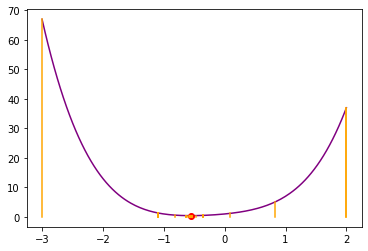

In [27]:
find_interval(a,b,e) 

### **Результат, полученный с помощью реализации алгоритма метода золотого сечения**

 > ### Минимум функции, равный 0.4299286455148117, достигается при x, равном -0.5596215728674432